In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Rectangle


## Markov linear jump systems

In [2]:
with open('/Users/jing/ltv_stabilization/data/mljs_seed88_T40_5t-square.pkl', 'rb') as f:
    mljs = pickle.load(f)

print(mljs.keys())


mljs_x = mljs['x_list']
mljs_LS = mljs['x_ls']
mljs_open = mljs['x_open']

mljs_w = mljs['w_list']
mljs_switch = mljs['switches']
mljs_theta = mljs['theta_list']


dict_keys(['x_open', 'x_list', 'u_list', 'theta_list', 'x_ls', 'u_ls', 'switches', 'w_list'])


dict_keys(['x_open', 'x_list', 'u_list', 'theta_list', 'x_ls', 'u_ls', 'switches', 'w_list'])


/Users/jing/opt/anaconda3/envs/apisel/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator


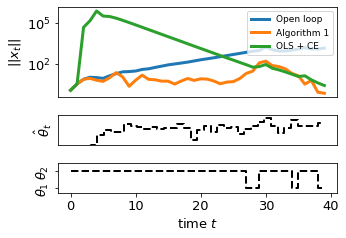

In [6]:
T = 40

with open('/Users/jing/ltv_stabilization/data/mljs_seed99_T40_5t-square.pkl', 'rb') as f:
    mljs = pickle.load(f)

print(mljs.keys())


mljs_x = mljs['x_list']
mljs_LS = mljs['x_ls']
mljs_open = mljs['x_open']

mljs_w = mljs['w_list']
mljs_switch = mljs['switches']
mljs_theta = mljs['theta_list']


plt.rc('font', size=13)    
plt.rcParams['figure.figsize'] = [5, 3.5]
f, (a0, a1,a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3,1,1 ]})
f.canvas.draw()

a0.semilogy(np.linalg.norm(np.array(mljs_open), axis=1), label='Open loop',linewidth=3)
a0.semilogy(np.linalg.norm(np.array(mljs_x), axis=1), label='Algorithm 1',linewidth=3)
a0.semilogy(np.linalg.norm(np.array(mljs_LS), axis=1), label='OLS + CE',linewidth=3)
a0.set_xticks([])
a0.set_xticks([], minor=True)
a0.legend( fontsize="9", loc='upper right')
a0.set_ylabel(r'$\|\|x_t\|\|$')

a1.step(np.arange(T-1),np.array([np.linalg.norm(theta) for theta in mljs_theta]),linewidth=2,linestyle='dashed', color = 'black')
a1_ticks=a2.get_yticks().tolist()
a1.set_xticks([])
a1.set_xticks([], minor=True)
a1.set_yticks([])
a1.set_yticks([], minor=True)
a1.set_ylim(1.1,2.7)
a1.set_ylabel(r'$\hat \theta_t$')




a2.step(np.arange(T),np.array(mljs_switch),linewidth=2,linestyle='dashed', color = 'black')
a2_ticks=a2.get_yticks().tolist()
a2_ticks[1]=r'$ \theta_1 $'
a2_ticks[2]=r'$ \theta_2 $'
a2.set_yticklabels(a2_ticks, rotation=90)
a2.set_xlabel('time '+r'$t$' )
a2.set_ylim(-0.3,1.5)

f.tight_layout()
f.savefig('MLJS_1.png')

dict_keys(['x_open', 'x_list', 'u_list', 'theta_list', 'x_ls', 'u_ls', 'switches', 'w_list'])


/Users/jing/opt/anaconda3/envs/apisel/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator


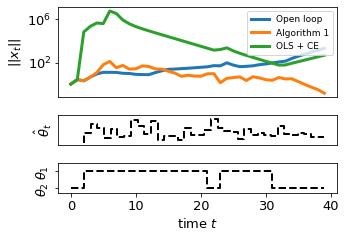

In [7]:
T = 40

with open('/Users/jing/ltv_stabilization/data/mljs_seed88_T40_5t-square.pkl', 'rb') as f:
    mljs = pickle.load(f)

print(mljs.keys())


mljs_x = mljs['x_list']
mljs_LS = mljs['x_ls']
mljs_open = mljs['x_open']

mljs_w = mljs['w_list']
mljs_switch = mljs['switches']
mljs_theta = mljs['theta_list']


plt.rc('font', size=13)    
plt.rcParams['figure.figsize'] = [5, 3.5]
f, (a0, a1,a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3,1,1 ]})
f.canvas.draw()

a0.semilogy(np.linalg.norm(np.array(mljs_open), axis=1), label='Open loop',linewidth=3)
a0.semilogy(np.linalg.norm(np.array(mljs_x), axis=1), label='Algorithm 1',linewidth=3)
a0.semilogy(np.linalg.norm(np.array(mljs_LS), axis=1), label='OLS + CE',linewidth=3)
a0.set_xticks([])
a0.set_xticks([], minor=True)
a0.legend( fontsize="9")
a0.set_ylabel(r'$\|\|x_t\|\|$')


a1.step(np.arange(T-1),np.array([np.linalg.norm(theta) for theta in mljs_theta]),linewidth=2,linestyle='dashed', color = 'black')
a1_ticks=a2.get_yticks().tolist()
a1.set_xticks([])
a1.set_xticks([], minor=True)
a1.set_yticks([])
a1.set_yticks([], minor=True)
a1.set_ylim(1.5,2.7)
a1.set_ylabel(r'$\hat \theta_t$')




a2.step(np.arange(T),np.array(mljs_switch),linewidth=2,linestyle='dashed', color = 'black')
a2_ticks=a2.get_yticks().tolist()
a2_ticks[1]=r'$ \theta_2 $'
a2_ticks[2]=r'$ \theta_1 $'
a2.set_yticklabels(a2_ticks, rotation=90)
a2.set_xlabel('time '+r'$t$' )
a2.set_ylim(-0.3,1.5)

f.tight_layout()
f.savefig('MLJS_2.png')

## LTV System

dict_keys(['x_open', 'u_open', 'x_list', 'u_list', 'theta_list', 'x_ls', 'u_ls', 'w_list'])


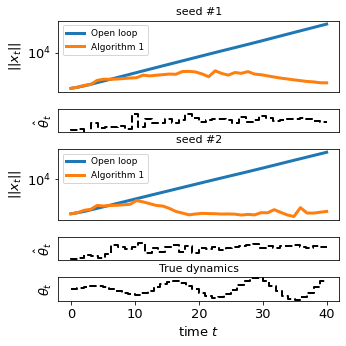

In [9]:
T = 40

A0 = np.array([[1.5, 0],[-0.1,1.]])
B0 = 0.05* np.array([[1.],[2/3]])

A_list = [np.hstack((A0,B0)).flatten(),]
for t in range(T):
    At = np.array([[1.5, 0.0025*t],[-0.1 * np.cos(0.3*t), 1.+ 0.05**(3/2) * np.sin(0.5*t)* np.sqrt(t)]])
    Bt = 0.05* np.array([[1.],[(2 + 0.1*t)/(3 + 0.1*t)]])
    A_list.append(np.hstack((At,Bt)).flatten())



with open('/Users/jing/ltv_stabilization/data/ltv_seed99_unstable_T40_5t-square.pkl', 'rb') as f:
    ltv = pickle.load(f)
    
with open('/Users/jing/ltv_stabilization/data/ltv_seed88_unstable_T40_5t-square.pkl', 'rb') as f:
    ltv_2 = pickle.load(f)

    
ltv2_x = ltv_2['x_list']
ltv2_open = ltv_2['x_open']
ltv2_theta = ltv_2['theta_list']

print(ltv.keys())
ltv_x = ltv['x_list']
ltv_open = ltv['x_open']
ltv_theta = ltv['theta_list']

plt.rc('font', size=13)    
plt.rcParams['figure.figsize'] = [5,5]
f, (a0, a4,a1,a5, a2) = plt.subplots(5, 1, gridspec_kw={'height_ratios': [3,1,3,1,1 ]})
f.canvas.draw()

a0.semilogy(np.linalg.norm(np.array(ltv_open), axis=1), label='Open loop',linewidth=3)
a0.semilogy(np.linalg.norm(np.array(ltv_x), axis=1), label='Algorithm 1',linewidth=3)
a0.set_xticks([])
a0.set_xticks([], minor=True)
a0.legend( fontsize="9")
a0.set_title('seed #1',fontsize='11')
a0.set_ylabel(r'$\|\|x_t\|\|$')


a4.step(np.arange(T-1),np.array([np.linalg.norm(theta) for theta in ltv_theta]),linewidth=2,linestyle='dashed', color = 'black')
a4_ticks=a2.get_yticks().tolist()
a4.set_xticks([])
a4.set_xticks([], minor=True)
a4.set_yticks([])
a4.set_yticks([], minor=True)
a4.set_ylim(1.2,2.3)
a4.set_ylabel(r'$\hat \theta_t$')

a1.set_title('seed #2', fontsize='11')
a1.semilogy(np.linalg.norm(np.array(ltv2_open), axis=1), label='Open loop',linewidth=3)
a1.semilogy(np.linalg.norm(np.array(ltv2_x), axis=1), label='Algorithm 1',linewidth=3)
a1.set_xticks([])
a1.set_xticks([], minor=True)
a1.legend( fontsize="9")
a1.set_ylabel(r'$\|\|x_t\|\|$')


a5.step(np.arange(T-1),np.array([np.linalg.norm(theta) for theta in ltv2_theta]),linewidth=2,linestyle='dashed', color = 'black')
a5_ticks=a2.get_yticks().tolist()
a5.set_xticks([])
a5.set_xticks([], minor=True)
a5.set_yticks([])
a5.set_yticks([], minor=True)
a5.set_ylim(1.2,2.3)
a5.set_ylabel(r'$\hat \theta_t$')




a2.set_title('True dynamics',fontsize='11')
a2.step(np.arange(T+1),np.linalg.norm(np.array(A_list),axis=1),linewidth=2,linestyle='dashed', color = 'black')
# a2_ticks=a2.get_yticks().tolist()
# a2_ticks[1]=r'$ \theta_1 $'
# a2_ticks[2]=r'$ \theta_2 $'
# a2.set_yticklabels(a2_ticks, rotation=90)
# a2.set_ylim(-0.3,1.5)
a2.set_xlabel('time '+r'$t$' )
a2.set_yticks([])
a2.set_yticks([], minor=True)
a2.set_ylabel(r'$\theta_t$')


f.tight_layout()
plt.subplots_adjust(wspace=10, hspace=0.4)

f.savefig('LTV.tiff')